In [1]:
# import all the required libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [10]:
# Paths
dataset_path = "./intel-image-classification-dataset/" 
train_path = os.path.join(dataset_path, "seg_train")  # Folder containing train images
train_path
test_path = os.path.join(dataset_path, "seg_test")    # Folder containing test images

In [11]:
# Filter classes (forest and mountain only)
classes = ['forest', 'mountain']


In [12]:
# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=classes
)
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=classes,
    shuffle=False
)

Found 4783 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [13]:
# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Training
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/10
150/150 [==============================] - 152s 999ms/step - loss: 0.2000 - accuracy: 0.9354 - val_loss: 0.0634 - val_accuracy: 0.9850
Epoch 2/10
150/150 [==============================] - 90s 601ms/step - loss: 0.1075 - accuracy: 0.9703 - val_loss: 0.0546 - val_accuracy: 0.9870
Epoch 3/10
150/150 [==============================] - 89s 593ms/step - loss: 0.0968 - accuracy: 0.9718 - val_loss: 0.0516 - val_accuracy: 0.9860
Epoch 4/10
150/150 [==============================] - 87s 579ms/step - loss: 0.0912 - accuracy: 0.9751 - val_loss: 0.0854 - val_accuracy: 0.9830
Epoch 5/10
150/150 [==============================] - 86s 570ms/step - loss: 0.0893 - accuracy: 0.9739 - val_loss: 0.1121 - val_accuracy: 0.9740
Epoch 6/10
150/150 [==============================] - 87s 582ms/step - loss: 0.0928 - accuracy: 0.9724 - val_loss: 0.0833 - val_accuracy: 0.9790


In [15]:
# Evaluation
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 [==============================] - 4s 106ms/step - loss: 0.0833 - accuracy: 0.9790
Test Accuracy: 97.90%


In [16]:
# Predictions
predictions = (model.predict(test_data) > 0.5).astype("int32")
true_labels = test_data.classes
print(classification_report(true_labels, predictions, target_names=classes))

32/32 [==============================] - 4s 106ms/step
              precision    recall  f1-score   support

      forest       0.97      0.99      0.98       474
    mountain       0.99      0.97      0.98       525

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



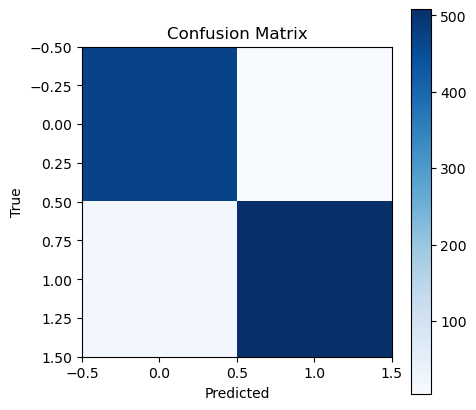

In [17]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# Save Model
model.save('forest_vs_mountain_classifier.h5')